In [1]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from cnn_parallell import experiment1, experiment2, experiment3, experiment4, experiment6, experiment7
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
from cnn_score import split_train_two

In [2]:
plt.rcParams["figure.figsize"] = (6,4)

In [3]:
DATA_SIZE = 5000

imgs = mnist.train_images()/255.0
labels = mnist.train_labels()
data_train = imgs[0:DATA_SIZE, 1:, 1:]
labels_train = labels[0:DATA_SIZE]
mnist_copy = data_train.copy()
subset_flattened = data_train.reshape(DATA_SIZE, 27*27)

noises = [.1, .2, .3, .4, .5]
thresholds = [.9, .85, .8, .7, .6, .5, .4]

noisy_mnists = [np.array([img + np.random.normal(.0, noise, size=(data_train[0].shape)) for img in mnist_copy]) for noise in noises]

In [4]:
def black_out_section(image, size):
    offset = 28 - size
    start_row = np.random.randint(3, offset-3)
    start_col = np.random.randint(3, offset-3)
    image_copy = image.copy()
    image_copy[start_row:start_row+size, start_col:start_col+size] = 0
    return image_copy

blackout_sizes = np.arange(3, 18, 3)
blackout_mnists = [np.array([black_out_section(img, size) for img in mnist_copy]) for size in blackout_sizes]

In [21]:
threshold_grid_results = {str(noise): {} for noise in noises}

In [ ]:
for n_i in range(len(noises)):
    for threshold in thresholds:
        dataset_exp6_noise = split_train_two(experiment6,
                                              noisy_mnists[n_i],
                                              data_train,
                                              labels_train,
                                              test_size=0.25,
                                              random_state=0, 
                                              threshhold=threshold)
        
        clfs_lr_ex6_ns = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
        clfs_lr_ex6_ns.fit(dataset_exp6_noise[0], dataset_exp6_noise[2])
        score = clfs_lr_ex6_ns.score(dataset_exp6_noise[1], dataset_exp6_noise[3])
        obtained_list = threshold_grid_results[str(noises[n_i])]
        obtained_list[str(threshold)] = score
        threshold_grid_results[str(noises[n_i])] = obtained_list

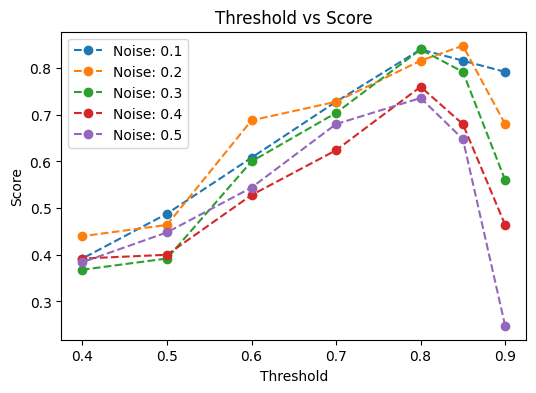

In [13]:
for noise in noises:
    plt.plot(thresholds, [threshold_grid_results[str(noise)][str(threshold)] for threshold in thresholds], label=f'Noise: {noise}', linestyle='--', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()


In [ ]:
threshold_grid_results_blackout = {str(bk): {} for bk in blackout_sizes}

In [ ]:
for b_i in range(len(blackout_sizes)):
    for threshold in thresholds:
        dataset_exp6_blackout = split_train_two(experiment6,
                                              blackout_mnists[b_i],
                                              data_train,
                                              labels_train,
                                              test_size=0.25,
                                              random_state=0, 
                                              threshhold=threshold)
        
        clfs_lr_ex6_bl = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
        clfs_lr_ex6_bl.fit(dataset_exp6_blackout[0], dataset_exp6_blackout[2])
        score = clfs_lr_ex6_bl.score(dataset_exp6_blackout[1], dataset_exp6_blackout[3])
        obtained_list = threshold_grid_results_blackout[str(blackout_sizes[b_i])]
        obtained_list[str(threshold)] = score
        threshold_grid_results_blackout[str(blackout_sizes[b_i])] = obtained_list

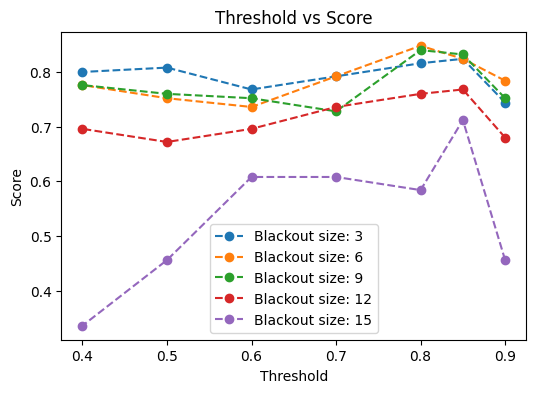

In [30]:
for size in blackout_sizes:
    plt.plot(thresholds, [threshold_grid_results_blackout[str(size)][str(threshold)] for threshold in thresholds], label=f'Blackout size: {size}', linestyle='--', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Score')
plt.legend()

In [5]:
lengths = [3, 4, 6, 8]
rings = [2, 3, 4]
grid_sizes = [1, 2, 3, 4]
param_grid_results = {str(ring): {str(length): {} for length in lengths} for ring in rings}

In [ ]:
for length in lengths:
    for ring in rings:
        for grid_size in grid_sizes:
            dataset_exp7 = split_train_two(experiment7,
                                           noisy_mnists[2], ## Using noise 0.3
                                           data_train,
                                           labels_train,
                                           test_size=0.25,
                                           random_state=0,
                                           length=length,
                                           rings=ring,
                                           grid_size=grid_size)
            
            clfs_lr_ex7 = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
            clfs_lr_ex7.fit(dataset_exp7[0], dataset_exp7[2])
            score = clfs_lr_ex7.score(dataset_exp7[1], dataset_exp7[3])
            obtained_list = param_grid_results[str(ring)][str(length)]
            obtained_list[str(grid_size)] = score
            param_grid_results[str(ring)][str(length)] = obtained_list

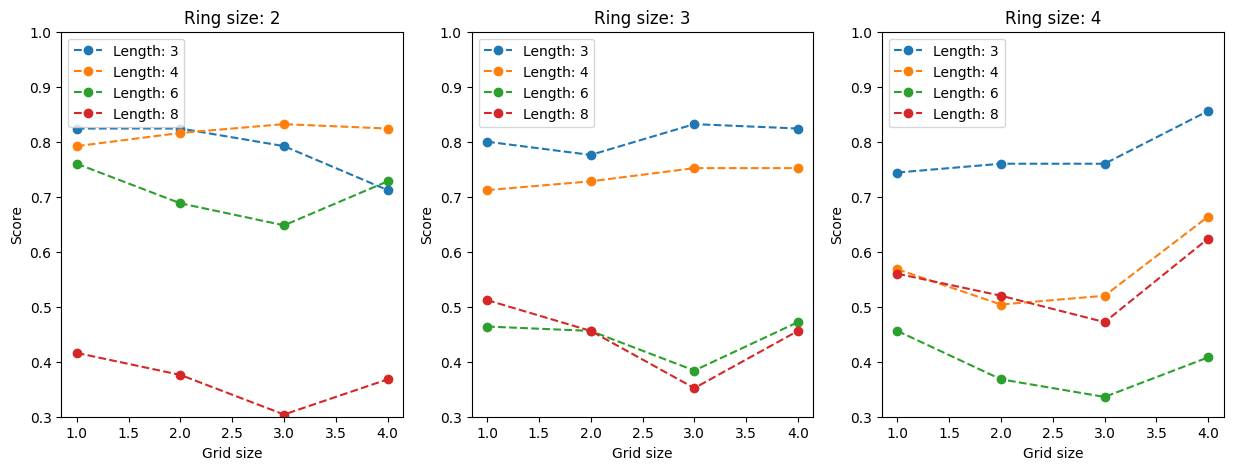

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ring in enumerate(rings):
    ax = axs[i]
    for length in lengths:
        ax.plot(grid_sizes, [param_grid_results[str(ring)][str(length)][str(grid_size)] for grid_size in grid_sizes], label=f'Length: {length}', linestyle='--', marker='o')
    ax.set_title(f'Ring size: {ring}')
    ax.set_xlabel('Grid size')
    ax.set_ylabel('Score')
    ax.set_ylim([.3, 1.])
    ax.legend()

In [ ]:
# same grid search but with blackout

param_grid_results_blackout = {str(ring): {str(length): {} for length in lengths} for ring in rings}

for length in lengths:
    for ring in rings:
        for grid_size in grid_sizes:
            dataset_exp7 = split_train_two(experiment7,
                                           blackout_mnists[2], ## Using blackout size 9
                                           data_train,
                                           labels_train,
                                           test_size=0.25,
                                           random_state=0,
                                           length=length,
                                           rings=ring,
                                           grid_size=grid_size)
            
            clfs_lr_ex7 = LogisticRegression(fit_intercept=True,
                                            multi_class='multinomial',
                                            penalty='l2',
                                            solver='saga',
                                            max_iter=1000,
                                            n_jobs=8,
                                            tol=0.001)
        
            clfs_lr_ex7.fit(dataset_exp7[0], dataset_exp7[2])
            score = clfs_lr_ex7.score(dataset_exp7[1], dataset_exp7[3])
            obtained_list = param_grid_results_blackout[str(ring)][str(length)]
            obtained_list[str(grid_size)] = score
            param_grid_results_blackout[str(ring)][str(length)] = obtained_list

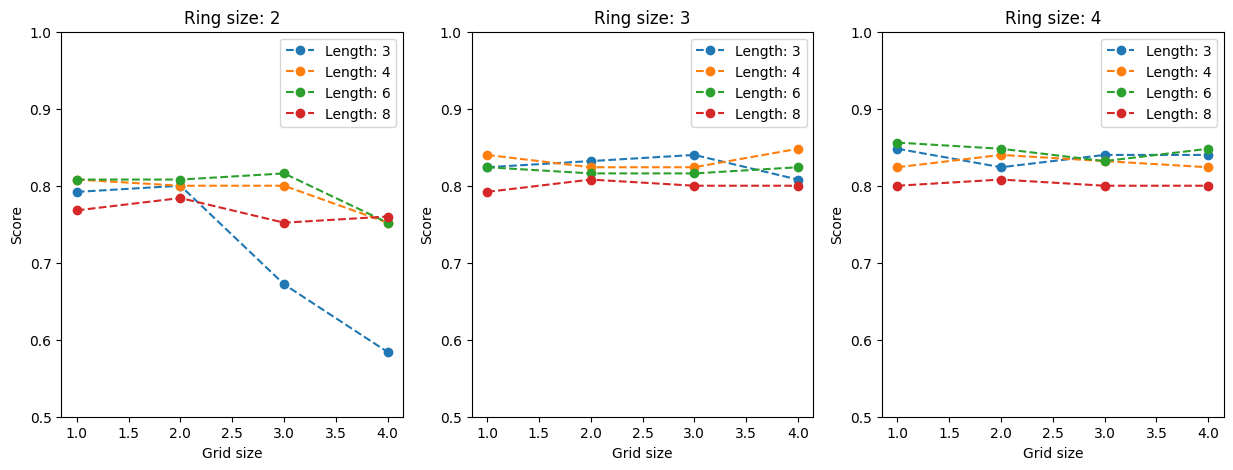

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ring in enumerate(rings):
    ax = axs[i]
    for length in lengths:
        ax.plot(grid_sizes, [param_grid_results_blackout[str(ring)][str(length)][str(grid_size)] for grid_size in grid_sizes], label=f'Length: {length}', linestyle='--', marker='o')
    ax.set_title(f'Ring size: {ring}')
    ax.set_xlabel('Grid size')
    ax.set_ylabel('Score')
    ax.set_ylim([.5, 1.])
    ax.legend()